In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu

#fix we found for matplot issues
import matplotlib
! pip install matplotlib==3.1.3
from pycbc.waveform import get_td_waveform
import pylab



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


--2022-02-14 17:37:54--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.1’

challenge1.gwf.1    100%[===================>]   3.84M  5.26MB/s    in 0.7s    

2022-02-14 17:37:56 (5.26 MB/s) - ‘challenge1.gwf.1’ saved [4025674/4025674]



TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)
sample rate is:  4096.0 Hz
and durations is:  0.000244140625 s


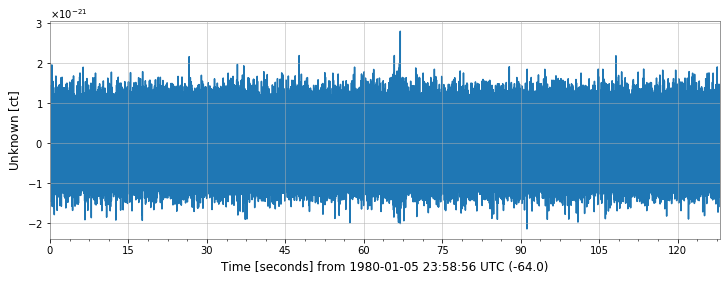

In [ ]:

print(gwpy_strain)       #get info on data to get runtime as 
print("sample rate is: ", gwpy_strain.sample_rate)
print("and durations is: ", gwpy_strain.dt)
%matplotlib inline       
plot = gwpy_strain.plot()    #timeframe plot
plot.show()


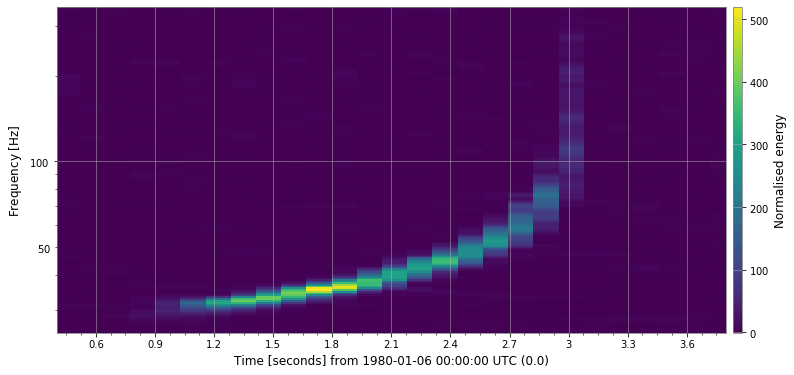

In [ ]:
hq = gwpy_strain.q_transform(frange=(10, 500), qrange=(20,160)) #q transform
plot = hq.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_ylim(25, 350)  #limiting y axis range
ax.set_xlim(0.4, 3.8)  #limiting x axis range
ax.set_yscale("log")   #setting y axis to logarithmic



In [ ]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2022-02-14 17:44:43--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  5.68MB/s    in 0.7s    

2022-02-14 17:44:44 (5.68 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



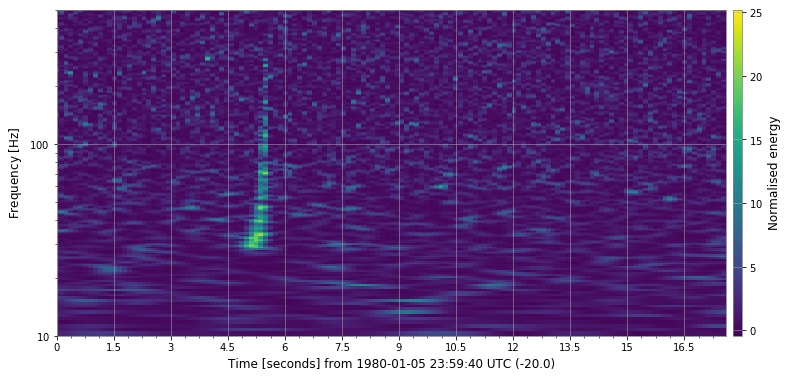

In [ ]:
    #CHallenge 2
gwpy_strain2 = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

pycbc_strain2 = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

hq2 = gwpy_strain2.q_transform(frange=(10, 500), qrange=(50,100)) #q transform
plot = hq2.plot()
plot.colorbar(label="Normalised energy")
ax2 = plot.gca()
ax2.set_ylim(10, 500)
ax2.set_xlim(-20,-2.4)
ax2.set_yscale("log")


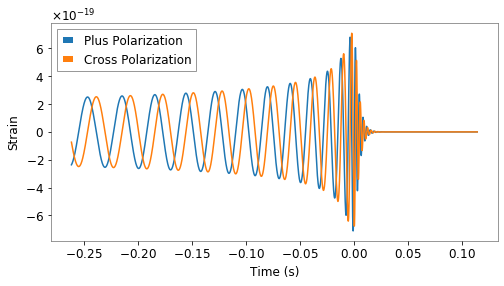

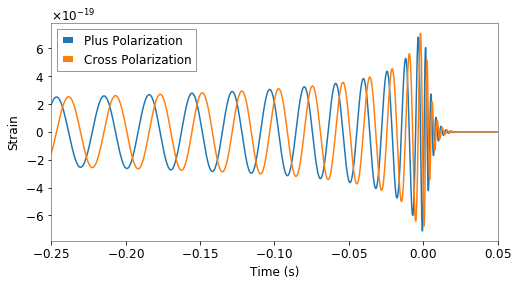

In [ ]:
%matplotlib inline
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt", mass1=30, mass2=30, delta_t=1.0/16384, f_lower=30,spin1z=0, spin2z=0,)   
pylab.figure(figsize=pylab.figaspect(0.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-0.25,0.05)
pylab.legend()
pylab.grid()
pylab.show()




In [ ]:
#Challenge 3
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf

--2022-02-14 19:29:16--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf’

challenge3.gwf      100%[===================>] 244.92M  10.8MB/s    in 19s     

2022-02-14 19:29:35 (13.2 MB/s) - ‘challenge3.gwf’ saved [256815066/256815066]



In [ ]:
gwpy_strain3 = TimeSeries.read('challenge3.gwf', channel="H1:CHALLENGE3") #loading in challenge 3 data

pycbc_strain3 = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')

specgram = gwpy_strain3.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.) #initialising spectogram
plot3 = specgram.plot()                                                  
ax3 = plot3.gca()           #editing specgram
ax3.set_yscale('log')
ax3.set_ylim(10, 1400)
ax3.colorbar(clim=(1e-28, 1e-17), norm="log", label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",) #cant see signal checking spec min and max and changed clim value
specgram.min()
specgram.max()


TypeError: ignored

In [ ]:
print("min: " , specgram.min())
specgram.max()

min:  1.5776004119119765e-27 ct / Hz(1/2)


<Quantity 6.45956529e-18 ct / Hz(1/2)>

In [ ]:
#challenge 4
from google.colab import drive
drive.mount('/content/drive')  #connect to drive


Mounted at /content/drive


In [ ]:
pycbc_strain = pycbc.types.load_timeseries('/content/drive/MyDrive/Colab Notebooks/GW_noisedata-2.npy') #import noisedata from drive